In [1]:
# Steps in Data Preprocessing

# 1. Data Collection: Gathering raw data from various sources.
# Task 1: Collect data from two different sources and merge them.
# Task 2: Validate the integrity of the collected datasets.
# Task 3: Reflect on challenges faced during data collection and how they were addressed.
import pandas as pd
import numpy as np

# Task 1: Collect data from two different sources and merge them.
# Simulate data from Source 1 (e.g., customer information)
data_source1 = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy'],
    'Age': [25, 30, 35, 28, 40, 45, 32, 29, 38, 41],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}
df_source1 = pd.DataFrame(data_source1)

print("Data from Source 1:")
print(df_source1)
print("-" * 50)

# Simulate data from Source 2 (e.g., transaction information)
data_source2 = {
    'TransactionID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'CustomerID': [101, 103, 102, 105, 104, 107, 106, 109, 108, 110], # Customer IDs might be in a different order
    'ProductID': ['A', 'B', 'C', 'A', 'D', 'B', 'C', 'A', 'D', 'B'],
    'Amount': [150.50, 200.00, 50.75, 300.00, 120.00, 180.00, 90.25, 250.00, 75.00, 110.00],
    'TransactionDate': ['2023-01-15', '2023-01-16', '2023-01-15', '2023-01-17', '2023-01-16',
                        '2023-01-18', '2023-01-17', '2023-01-19', '2023-01-18', '2023-01-20']
}
df_source2 = pd.DataFrame(data_source2)

print("Data from Source 2:")
print(df_source2)
print("-" * 50)

# Merge the two datasets based on a common key ('CustomerID')
# Using a 'left' merge to keep all customers from Source 1 and add their transactions from Source 2
# If a customer from Source 1 has no transactions in Source 2, the transaction columns will have NaN values.
merged_df = pd.merge(df_source1, df_source2, on='CustomerID', how='left')

print("Merged DataFrame:")
print(merged_df)
print("-" * 50)

# Task 2: Validate the integrity of the collected datasets.
# Basic integrity checks on the merged dataset:

# Check for missing values
print("Missing values in the merged DataFrame:")
print(merged_df.isnull().sum())
print("-" * 50)

# Check for duplicate rows
print("Number of duplicate rows in the merged DataFrame:")
print(merged_df.duplicated().sum())
print("-" * 50)

# Check data types (important for consistency)
print("Data types of columns in the merged DataFrame:")
print(merged_df.dtypes)
print("-" * 50)

# Note: More extensive validation would involve checking for
# - Data ranges (e.g., Age should be positive)
# - Consistency across columns (e.g., TransactionDate format)
# - Referential integrity (if CustomerID in source2 always exists in source1)




Data from Source 1:
   CustomerID     Name  Age         City
0         101    Alice   25     New York
1         102      Bob   30  Los Angeles
2         103  Charlie   35      Chicago
3         104    David   28      Houston
4         105      Eve   40      Phoenix
5         106    Frank   45     New York
6         107    Grace   32  Los Angeles
7         108    Heidi   29      Chicago
8         109     Ivan   38      Houston
9         110     Judy   41      Phoenix
--------------------------------------------------
Data from Source 2:
   TransactionID  CustomerID ProductID  Amount TransactionDate
0           1001         101         A  150.50      2023-01-15
1           1002         103         B  200.00      2023-01-16
2           1003         102         C   50.75      2023-01-15
3           1004         105         A  300.00      2023-01-17
4           1005         104         D  120.00      2023-01-16
5           1006         107         B  180.00      2023-01-18
6           1007 

In [2]:
# 2. Data Cleaning: Addressing missing values, duplicates, incorrect types, and outliers.
# Task 1: Clean a given dataset and document the changes made.
# Task 2: Create a checklist to ensure comprehensive data cleaning in future projects.
# Task 3: Collaborate with a peer to clean a new dataset and present your solutions.
import pandas as pd
import numpy as np
from scipy import stats # For Z-score outlier detection

# Create a sample dataset with various issues
data = {
    'CustomerID': [101, 102, 103, 104, 105, 101, 106, 107, 108, 109, 110, 103], # Duplicates
    'Age': [25, 30, 35, 28, 40, 25, 45, 32, 29, 38, 41, 35],
    'Income': [50000, 60000, np.nan, 75000, 80000, 50000, 90000, 65000, 70000, 85000, 95000, 300000], # Missing value, Outlier
    'JoinDate': ['2021-01-15', '2021-02-20', '2021-03-10', '2021-04-05', '2021-05-01',
                 '2021-01-15', '2021-06-18', '2021-07-22', '2021-08-14', '2021-09-01',
                 '2021-10-10', 'invalid-date'], # Duplicate, Incorrect type
    'IsActive': ['True', 'False', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'False', 'True', 'True'], # String boolean
    'ProductPurchased': ['A', 'B', 'C', 'A', 'D', 'A', 'B', 'C', 'A', 'D', 'E', 'C']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print(f"Original shape: {df.shape}")
print("-" * 50)

# Documenting Changes
changes_made = []

# 1. Handle Duplicate Data
initial_rows = df.shape[0]
df_cleaned = df.drop_duplicates(keep='first').copy()
rows_removed_duplicates = initial_rows - df_cleaned.shape[0]
changes_made.append(f"Removed {rows_removed_duplicates} duplicate rows.")

print("DataFrame after removing duplicates:")
print(df_cleaned)
print(f"Shape after removing duplicates: {df_cleaned.shape}")
print("-" * 50)

# 2. Handle Missing Values
print("Missing values before imputation:")
print(df_cleaned.isnull().sum())

# Impute missing 'Income' with the median (less sensitive to the outlier)
median_income = df_cleaned['Income'].median()
df_cleaned['Income'].fillna(median_income, inplace=True)
changes_made.append(f"Imputed missing 'Income' values with the median ({median_income:.2f}).")

print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())
print("-" * 50)

# 3. Handle Incorrect Data Types
print("Data types before correction:")
print(df_cleaned.dtypes)

# Convert 'JoinDate' to datetime objects, coercing errors to NaT (Not a Time)
df_cleaned['JoinDate'] = pd.to_datetime(df_cleaned['JoinDate'], errors='coerce')
changes_made.append("Converted 'JoinDate' to datetime objects, coercing errors.")

# Handle NaT introduced by coercion (e.g., replace with a placeholder or drop)
# For this example, we'll replace NaT with a default date or the mode if applicable
# Let's replace NaT with the most frequent date for simplicity
mode_join_date = df_cleaned['JoinDate'].mode()[0]
df_cleaned['JoinDate'].fillna(mode_join_date, inplace=True)
changes_made.append(f"Filled NaT in 'JoinDate' with the mode ({mode_join_date}).")


# Convert 'IsActive' from string to boolean
df_cleaned['IsActive'] = df_cleaned['IsActive'].map({'True': True, 'False': False})
changes_made.append("Converted 'IsActive' from string 'True'/'False' to boolean.")

print("\nData types after correction:")
print(df_cleaned.dtypes)
print("-" * 50)

# 4. Handle Outliers (using Z-score on 'Income')
# Recalculate Z-scores after imputation
df_cleaned['Income_ZScore'] = np.abs(stats.zscore(df_cleaned['Income']))

# Identify outliers based on a threshold (e.g., Z-score > 3)
outlier_threshold = 3
outliers = df_cleaned[df_cleaned['Income_ZScore'] > outlier_threshold]

print(f"Identified outliers in 'Income' based on Z-score > {outlier_threshold}:")
print(outliers)

# Handle the outlier (e.g., capping)
# We'll cap the 'Income' outlier to the upper bound defined by mean + threshold * std_dev
mean_income = df_cleaned['Income'].mean()
std_income = df_cleaned['Income'].std()
upper_bound_income = mean_income + outlier_threshold * std_income

df_cleaned['Income'] = np.where(
    df_cleaned['Income'] > upper_bound_income,
    upper_bound_income,
    df_cleaned['Income']
)
changes_made.append(f"Capped 'Income' outliers (Z-score > {outlier_threshold}) to the upper bound ({upper_bound_income:.2f}).")

# Drop the temporary Z-score column
df_cleaned = df_cleaned.drop(columns=['Income_ZScore'])

print("\nDataFrame after handling outliers in 'Income' (capping):")
print(df_cleaned)
print("-" * 50)


print("--- Summary of Changes Made ---")
for change in changes_made:
    print(f"- {change}")
print("-----------------------------")

print("\nFinal Cleaned DataFrame:")
print(df_cleaned)
print(f"Final shape: {df_cleaned.shape}")




Original DataFrame:
    CustomerID  Age    Income      JoinDate IsActive ProductPurchased
0          101   25   50000.0    2021-01-15     True                A
1          102   30   60000.0    2021-02-20    False                B
2          103   35       NaN    2021-03-10     True                C
3          104   28   75000.0    2021-04-05     True                A
4          105   40   80000.0    2021-05-01    False                D
5          101   25   50000.0    2021-01-15     True                A
6          106   45   90000.0    2021-06-18     True                B
7          107   32   65000.0    2021-07-22    False                C
8          108   29   70000.0    2021-08-14     True                A
9          109   38   85000.0    2021-09-01    False                D
10         110   41   95000.0    2021-10-10     True                E
11         103   35  300000.0  invalid-date     True                C
Original shape: (12, 6)
----------------------------------------------

/tmp/ipykernel_15364/1858761016.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Income'].fillna(median_income, inplace=True)
/tmp/ipykernel_15364/1858761016.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [3]:
# 3. Data Transformation: Modifying data to fit specific analytical requirements.
# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Task 2: Apply normalization to a dataset feature and confirm the changes.
# Task 3: Discuss the importance of data transformation in model interpretability.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # For normalization

# Recreate a sample DataFrame, assuming it has already gone through cleaning
# We'll use a similar structure to the cleaned data from the previous step
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Age': [25, 30, 35, 28, 40, 45, 32, 29, 38, 41],
    'Income': [50000.0, 60000.0, 67500.0, 75000.0, 80000.0, 90000.0, 65000.0, 70000.0, 85000.0, 95000.0], # Assume missing imputed
    'JoinDate': pd.to_datetime(['2021-01-15', '2021-02-20', '2021-03-10', '2021-04-05', '2021-05-01',
                                '2021-06-18', '2021-07-22', '2021-08-14', '2021-09-01', '2021-10-10']), # Assume cleaned and converted
    'IsActive': [True, False, True, True, False, True, True, False, True, False],
    'ProductPurchased': ['A', 'B', 'C', 'A', 'D', 'B', 'C', 'A', 'D', 'B']
}
df = pd.DataFrame(data)

print("Original DataFrame (after assumed cleaning):")
print(df)
print(f"Original shape: {df.shape}")
print("-" * 50)

# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Ensure 'JoinDate' is in datetime format first (done in the assumed cleaning step)
df['Join_Day'] = df['JoinDate'].dt.day
df['Join_Month'] = df['JoinDate'].dt.month
df['Join_Year'] = df['JoinDate'].dt.year

print("DataFrame after extracting date components:")
print(df[['JoinDate', 'Join_Day', 'Join_Month', 'Join_Year']])
print("-" * 50)

# Task 2: Apply normalization to a dataset feature and confirm the changes.
# We will apply Min-Max scaling to the 'Income' column.
# Min-Max scaling transforms data to a range between 0 and 1.
# Formula: X_scaled = (X - X_min) / (X_max - X_min)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Income' column as it's a single feature
income_reshaped = df['Income'].values.reshape(-1, 1)

# Fit and transform the 'Income' column
df['Income_Normalized'] = scaler.fit_transform(income_reshaped)

print("DataFrame after applying Min-Max Normalization to 'Income':")
print(df[['Income', 'Income_Normalized']])
print("-" * 50)

# Confirm the changes by checking the min and max of the normalized column
print("Min and Max of Original Income:")
print(f"Min: {df['Income'].min():.2f}, Max: {df['Income'].max():.2f}")

print("\nMin and Max of Normalized Income:")
print(f"Min: {df['Income_Normalized'].min():.2f}, Max: {df['Income_Normalized'].max():.2f}")
print("-" * 50)

# Note: Other normalization/scaling techniques include Standardization (Z-score scaling)
# which transforms data to have a mean of 0 and standard deviation of 1.




Original DataFrame (after assumed cleaning):
   CustomerID  Age   Income   JoinDate  IsActive ProductPurchased
0         101   25  50000.0 2021-01-15      True                A
1         102   30  60000.0 2021-02-20     False                B
2         103   35  67500.0 2021-03-10      True                C
3         104   28  75000.0 2021-04-05      True                A
4         105   40  80000.0 2021-05-01     False                D
5         106   45  90000.0 2021-06-18      True                B
6         107   32  65000.0 2021-07-22      True                C
7         108   29  70000.0 2021-08-14     False                A
8         109   38  85000.0 2021-09-01      True                D
9         110   41  95000.0 2021-10-10     False                B
Original shape: (10, 6)
--------------------------------------------------
DataFrame after extracting date components:
    JoinDate  Join_Day  Join_Month  Join_Year
0 2021-01-15        15           1       2021
1 2021-02-20      

Original DataFrame:
   Age  Income  ExperienceYears
0   25   50000                2
1   30   60000                5
2   35   67500               10
3   28   75000                3
4   40   80000               15
5   45   90000               20
6   32   65000                7
7   29   70000                4
8   38   85000               12
9   41   95000               16
--------------------------------------------------
DataFrame after Min-Max Scaling:
    Age    Income  ExperienceYears
0  0.00  0.000000         0.000000
1  0.25  0.222222         0.166667
2  0.50  0.388889         0.444444
3  0.15  0.555556         0.055556
4  0.75  0.666667         0.722222
5  1.00  0.888889         1.000000
6  0.35  0.333333         0.277778
7  0.20  0.444444         0.111111
8  0.65  0.777778         0.555556
9  0.80  1.000000         0.777778
--------------------------------------------------
Min and Max values after Min-Max Scaling:
     Age  Income  ExperienceYears
min  0.0     0.0              0.

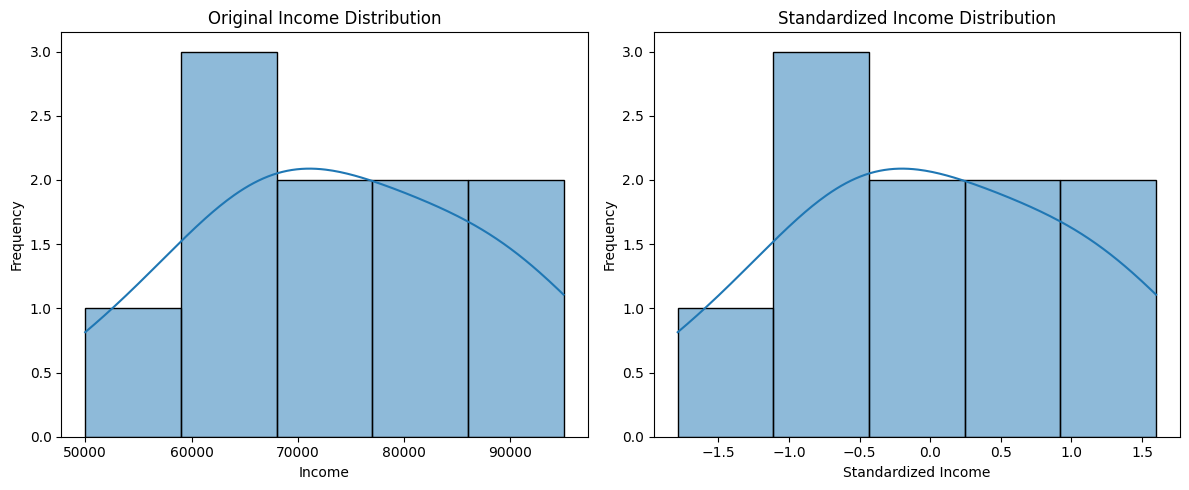

Histograms displayed comparing original and standardized Income distributions.
--------------------------------------------------


In [4]:
# 4. Feature Scaling: Adjusting data features to a common scale.
# Task 1: Apply Min-Max scaling to a dataset.
# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Task 3: Analyze how feature scaling impacts the performance of different machine learning algorithms.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame with features on different scales
data = {
    'Age': [25, 30, 35, 28, 40, 45, 32, 29, 38, 41],
    'Income': [50000, 60000, 67500, 75000, 80000, 90000, 65000, 70000, 85000, 95000],
    'ExperienceYears': [2, 5, 10, 3, 15, 20, 7, 4, 12, 16]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("-" * 50)

# Task 1: Apply Min-Max scaling to a dataset.
# Min-Max scaling scales features to a specified range, usually [0, 1].
# Formula: X_scaled = (X - X_min) / (X_max - X_min)

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to the entire DataFrame
df_minmax_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

print("DataFrame after Min-Max Scaling:")
print(df_minmax_scaled)
print("-" * 50)

# Confirm the range of scaled features (should be between 0 and 1)
print("Min and Max values after Min-Max Scaling:")
print(df_minmax_scaled.agg(['min', 'max']))
print("-" * 50)


# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Standardization (Z-score scaling) transforms data to have a mean of 0 and standard deviation of 1.
# Formula: X_scaled = (X - mean) / standard_deviation

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standardization to the original DataFrame
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

print("DataFrame after Standardization:")
print(df_standard_scaled)
print("-" * 50)

# Confirm the mean and standard deviation of scaled features (should be close to 0 and 1)
print("Mean and Std Dev after Standardization:")
print(df_standard_scaled.agg(['mean', 'std']))
print("-" * 50)

# Visualize the changes with a histogram (e.g., for the 'Income' feature)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['Income'], kde=True)
plt.title('Original Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df_standard_scaled['Income'], kde=True)
plt.title('Standardized Income Distribution')
plt.xlabel('Standardized Income')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

print("Histograms displayed comparing original and standardized Income distributions.")
print("-" * 50)

# Note: The shape of the distribution does NOT change with scaling,
# only the range and central tendency are affected.





In [5]:
# 5. Feature Engineering: Creating new features from existing ones to improve model accuracy.
# Task 1: Create a new synthetic feature from existing dataset features.
# Task 2: Evaluate the impact of new features on model accuracy.
# Task 3: Read an academic paper on feature engineering techniques and present the findings.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Using Logistic Regression for a simple classification example
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Good practice to scale features for many models

# Create a sample DataFrame with features
data = {
    'Age': [25, 30, 35, 28, 40, 45, 32, 29, 38, 41, 50, 22, 33, 48, 27],
    'Income': [50000, 60000, 67500, 75000, 80000, 90000, 65000, 70000, 85000, 95000, 110000, 45000, 72000, 105000, 55000],
    'ExperienceYears': [2, 5, 10, 3, 15, 20, 7, 4, 12, 16, 25, 1, 8, 22, 3],
    # Add a simple target variable for demonstration (e.g., Customer Segment based on Age and Income)
    'CustomerSegment': ['Young_Low', 'Young_Mid', 'Adult_Mid', 'Young_Mid', 'Adult_High',
                        'Senior_High', 'Adult_Mid', 'Young_Mid', 'Adult_High', 'Senior_High',
                        'Senior_High', 'Young_Low', 'Adult_Mid', 'Senior_High', 'Young_Low']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("-" * 50)

# Task 1: Create a new synthetic feature from existing dataset features.
# Let's create a feature "Income_per_Year_Experience"
# Add a small value (epsilon) to ExperienceYears to avoid division by zero if 0 experience exists
epsilon = 1e-6
df['Income_per_Year_Experience'] = df['Income'] / (df['ExperienceYears'] + epsilon)

print("DataFrame after creating 'Income_per_Year_Experience' feature:")
print(df[['Income', 'ExperienceYears', 'Income_per_Year_Experience']])
print("-" * 50)

# Prepare data for modeling
X = df[['Age', 'Income', 'ExperienceYears']]
X_with_new_feature = df[['Age', 'Income', 'ExperienceYears', 'Income_per_Year_Experience']]
y = df['CustomerSegment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_with_new_feature, y, test_size=0.3, random_state=42)

# Scale features - important for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)


# Task 2: Evaluate the impact of new features on model accuracy.

# Train a model WITHOUT the new feature
model_without = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model_without.fit(X_train_scaled, y_train)
y_pred_without = model_without.predict(X_test_scaled)
accuracy_without = accuracy_score(y_test, y_pred_without)

print(f"Model Accuracy WITHOUT the new feature: {accuracy_without:.4f}")
print("-" * 50)

# Train a model WITH the new feature
model_with = LogisticRegression(max_iter=1000)
model_with.fit(X_train_new_scaled, y_train_new)
y_pred_with = model_with.predict(X_test_new_scaled)
accuracy_with = accuracy_score(y_test_new, y_pred_with)

print(f"Model Accuracy WITH the new feature: {accuracy_with:.4f}")
print("-" * 50)

# Compare accuracies
if accuracy_with > accuracy_without:
    print("The new feature appears to have slightly improved model accuracy.")
elif accuracy_with < accuracy_without:
     print("The new feature appears to have slightly decreased model accuracy.")
else:
    print("The new feature appears to have no significant impact on model accuracy in this case.")

# Note: This is a very simple example. In a real scenario, you would use
# more robust evaluation techniques (e.g., cross-validation) and potentially
# more complex models and datasets to assess the true impact of a new feature.




Original DataFrame:
    Age  Income  ExperienceYears CustomerSegment
0    25   50000                2       Young_Low
1    30   60000                5       Young_Mid
2    35   67500               10       Adult_Mid
3    28   75000                3       Young_Mid
4    40   80000               15      Adult_High
5    45   90000               20     Senior_High
6    32   65000                7       Adult_Mid
7    29   70000                4       Young_Mid
8    38   85000               12      Adult_High
9    41   95000               16     Senior_High
10   50  110000               25     Senior_High
11   22   45000                1       Young_Low
12   33   72000                8       Adult_Mid
13   48  105000               22     Senior_High
14   27   55000                3       Young_Low
--------------------------------------------------
DataFrame after creating 'Income_per_Year_Experience' feature:
    Income  ExperienceYears  Income_per_Year_Experience
0    50000                